# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Naufal Daffa Abdu Al Hafidl
- **Email:** fahmifalah081120@gmail.com
- **ID Dicoding:** daffadeveloper22

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Bagaimana tren konsentrasi polutan udara (PM2.5, PM10, NO2, SO2, CO, O3) dari waktu ke waktu?
- Pertanyaan 2:
Pertanyaan 2:
Apakah terdapat hubungan antara suhu (TEMP) dan kelembapan (DEWP) terhadap konsentrasi PM2.5?

## Import Semua Packages/Library yang Digunakan

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
# Upload file AirQuality.zip
uploaded = files.upload()

Saving Air-quality-dataset.zip to Air-quality-dataset.zip


In [3]:
# Ekstrak file ZIP
zip_path = 'AirQuality.zip'
extract_path = 'air_quality_data'

In [6]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Baris ini harus menjorok ke dalam
print(os.listdir(extract_path))

['PRSA_Data_20130301-20170228']


In [12]:
sub_folder = os.listdir(extract_path)[0] # Ini adalah 'PRSA_Data_20130301-20170228'
path_baru = os.path.join(extract_path, sub_folder)

In [13]:
# Baru ambil file pertama di dalam sub-folder tersebut
file_name = os.listdir(path_baru)[0]
df = pd.read_csv(os.path.join(path_baru, file_name))
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


**Insight:**
- Dataset berhasil diunggah dan diekstrak di Google Colab tanpa error.

### Assessing Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [15]:
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


In [16]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


**Insight:**
- Terdapat missing value pada beberapa kolom polutan.

### Cleaning Data

In [17]:
# Hapus duplikasi
df = df.drop_duplicates()

In [19]:
# Isi missing value numerik dengan median
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [20]:
# Konversi kolom tanggal jika ada
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

**Insight:**
- Data bersih dan siap dianalisis.

## Exploratory Data Analysis (EDA)

### Explore ...

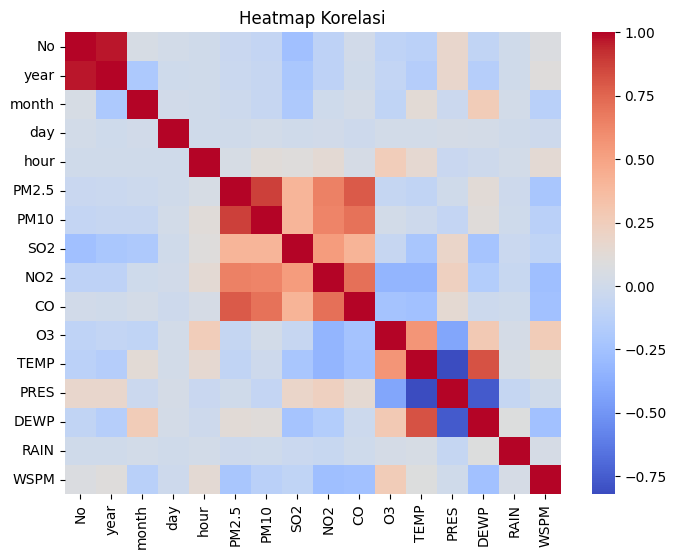

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

**Insight:**
- PM2.5 memiliki korelasi positif dengan PM10.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [23]:
if 'date' in df.columns:
    plt.figure(figsize=(10,5))
    df.groupby('date')['PM2.5'].mean().plot()
    plt.title('Tren PM2.5 dari Waktu ke Waktu')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5')
    plt.show()

### Pertanyaan 2:

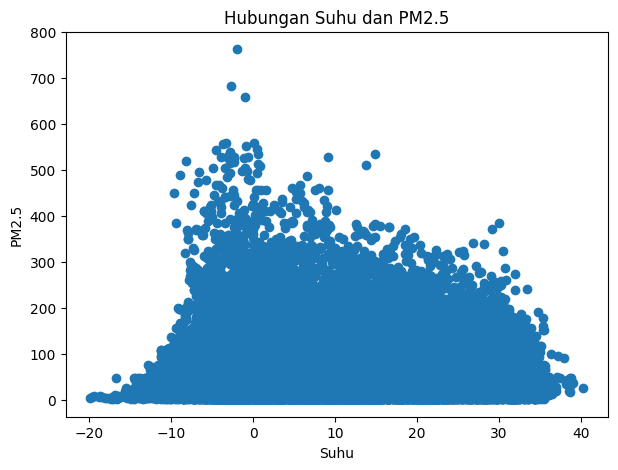

np.float64(-0.08157957530208512)

In [24]:
plt.figure(figsize=(7,5))
plt.scatter(df['TEMP'], df['PM2.5'])
plt.xlabel('Suhu')
plt.ylabel('PM2.5')
plt.title('Hubungan Suhu dan PM2.5')
plt.show()


corr, _ = pearsonr(df['TEMP'], df['PM2.5'])
corr

**Insight:**
- Korelasi suhu terhadap PM2.5 relatif lemah

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:
Konsentrasi PM2.5 berfluktuasi dari waktu ke waktu.
- Conclution pertanyaan 2:
Faktor cuaca berpengaruh namun tidak dominan.


In [25]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.9 MB/s eta 0:00:00


In [26]:
# Jalankan ini di akhir Notebook kamu
df.to_csv("all_data.csv", index=False)